In [195]:
import math
import random
import datetime
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import animation, rc
from IPython.display import HTML

from matplotlib import pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

%matplotlib inline

import matplotlib.animation as animation
print(animation.writers.list())

rc('animation', writer='ffmpeg')
rc('animation', html='html5')



['ffmpeg', 'ffmpeg_file', 'html']


## N Body Problem

The formula for the acceleration from multiple bodies of mass is:

$$a_{ix} = \sum_{i!=j}^j \frac{Gm_j}{((x_i - x_j)^2 + (y_i - y_j)^2 + (z_i - z_j)^2)^{3/2}}(x_j - x_i)\hat{ x}$$

Where:
- $a_{ix}$ is acceleration in the **x direction** for body $i$, 
- $G$ is the gravitational constant, 
- $m$ is the mass of a body
- $x, y, z$ are the coordinates of a body
- the body we are calculating for is index $i$, and we sum contributions from all other indices j.

Method (Euler Cromer):
- we know the initial points of all bodies
- we know the initial velocities of all bodies
- for timestep in time:
    - for body in bodies:
        - calculate the next position = current position + velocity * time step = next position
        - calculate the acceleration based on gravity & force 
        - update velocity: velocity += acceleration * timestep


In [196]:
class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

In [197]:
class Body:
    def __init__(
        self, 
        location, 
        mass, 
        velocity, 
        name):
        
        self.location = location
        self.mass = mass
        self.velocity = velocity
        self.name = name

In [198]:
def calculate_single_body_acceleration(
    bodies, 
    body_index):
    
    G_const = 6.67408e-11 #m3 kg-1 s-2
    
    acceleration = Point(0,0,0)
    target_body = bodies[body_index]
    
    for index, external_body in enumerate(bodies):
        if index != body_index:
            r = \
                (target_body.location.x - external_body.location.x)**2 + \
                (target_body.location.y - external_body.location.y)**2 + \
                (target_body.location.z - external_body.location.z)**2
            r = math.sqrt(r)
            
            tmp = G_const * external_body.mass / r**3
            
            acceleration.x += tmp * (external_body.location.x - target_body.location.x)
            acceleration.y += tmp * (external_body.location.y - target_body.location.y)
            acceleration.z += tmp * (external_body.location.z - target_body.location.z)

    return acceleration

In [199]:
def compute_velocity(
    bodies, 
    time_step = 1):
    
    for body_index, target_body in enumerate(bodies):
        
        acceleration = calculate_single_body_acceleration(bodies, body_index)
        
        target_body.velocity.x += acceleration.x * time_step
        target_body.velocity.y += acceleration.y * time_step
        target_body.velocity.z += acceleration.z * time_step 

In [200]:
def update_location(
    bodies, 
    time_step = 1):
    
    for target_body in bodies:
        
        target_body.location.x += target_body.velocity.x * time_step
        target_body.location.y += target_body.velocity.y * time_step
        target_body.location.z += target_body.velocity.z * time_step

In [201]:
def compute_gravity_step(
    bodies, 
    time_step = 1):
    
    compute_velocity(bodies, time_step = time_step)
    
    update_location(bodies, time_step = time_step)
    

In [202]:
def run_simulation(
    bodies, 
    names = None, 
    time_step = 1, 
    number_of_steps = 10000,
    report_freq = 100):

    #create output container for each body
    body_locations_hist = []
    
    for current_body in bodies:
        body_locations_hist.append({"x":[], "y":[], "z":[], "name":current_body.name})
        
    progress_steps = int(number_of_steps / 100)
    
    for i in range(1,number_of_steps):
        compute_gravity_step(bodies, time_step = 1000)            
        
        if i % progress_steps == 0 :
            print ("[{}] Progress: {} {}/{}".format(
                datetime.datetime.now(),
                i/number_of_steps*100, 
                i, 
                number_of_steps))
        
        if i % report_freq == 0:
            for index, body_location in enumerate(body_locations_hist):
                
                body = bodies[index]
                
                body_location["x"].append(body.location.x)
                body_location["y"].append(body.location.y)           
                body_location["z"].append(body.location.z)
                
                # print ("{} x = {}".format(bodies[index].name, body.location.x))
                
    return body_locations_hist      


In [203]:
color_dict = {
        "Earth" : 'b', 
        "Sun" : 'y', 
        "Mars" : 'r', 
        "Jupyter" : 'c',
        "Venus" : 'm',
        "Saturn" : 'g',
        "Pluto" : 'm',
        "Uranus" : 'c',
        "Neptune" : 'b',
        "Venus" : 'c',
        "Mercury": 'y'
    }

In [204]:
def plot_output(bodies, outfile = None):
    
    fig = plot.figure()
    colours = ['r','b','g','y','m','c']
    ax = fig.add_subplot(1,1,1, projection='3d')
    max_range = 0
    for current_body in bodies: 
        max_dim = max(max(current_body["x"]),max(current_body["y"]),max(current_body["z"]))
        if max_dim > max_range:
            max_range = max_dim
        ax.plot(
            current_body["x"], 
            current_body["y"], 
            current_body["z"], 
            c = color_dict[current_body["name"]], 
            label = current_body["name"])        
    
    ax.set_xlim([-max_range,max_range])    
    ax.set_ylim([-max_range,max_range])
    ax.set_zlim([-max_range,max_range])
    ax.legend()        

    if outfile:
        plot.savefig(outfile)
    else:
        plot.show()

In [205]:
bodies = {
    "sun" : {
        "location": Point(0,0,0), 
        "mass": 2e30, 
        "velocity": Point(0,0,0), 
        "name": "Sun"
    },
    "mercury" : {
        "location": Point(0,5.7e10,0), 
        "mass": 3.285e23, 
        "velocity": Point(47000,0,0),
        "name" : "Mercury"
    },
    "venus" : {
        "location": Point(0,1.1e11,0),
        "mass": 4.8e24,
        "velocity": Point(35000,0,0),
        "name": "Venus"
    },
    "earth" : {
        "location": Point(0,1.5e11,0),
        "mass":6e24,
        "velocity": Point(30000,0,0),
        "name": "Earth"
    },
    "mars" : {
        "location": Point(0,2.2e11,0),
        "mass":2.4e24,
        "velocity": Point(24000,0,0),
        "name": "Mars"
    },
    "jupiter" : {
        "location": Point(0,7.7e11,0),
        "mass":1e28,
        "velocity": Point(13000,0,0),
        "name": "Jupyter"
    },
    "saturn" : {
        "location": Point(0,1.4e12,0),
        "mass": 5.7e26,
        "velocity": Point(9000,0,0),
        "name": "Saturn"
    },
    "uranus" : {
        "location": Point(0,2.8e12,0), 
        "mass":8.7e25, 
        "velocity": Point(6835,0,0),
        "name": "Uranus"
    },
    "neptune" : {
        "location": Point(0,4.5e12,0),
        "mass": 1e26, 
        "velocity": Point(5477,0,0),
        "name": "Neptune"
    },
    "pluto" : {
        "location": Point(0,3.7e12,0), 
        "mass":1.3e22, 
        "velocity":Point(4748,0,0),
        "name": "Pluto"
    }
}


In [206]:
bodies = [
    Body(
        location = bodies[x]["location"],
        mass = bodies[x]["mass"],
        velocity = bodies[x]["velocity"],
        name = bodies[x]["name"])
    for x in bodies.keys()]

In [ ]:
motions2 = run_simulation(
    bodies, 
    time_step = 100000, 
    number_of_steps = 80000000, 
    report_freq = 1000)

[2019-08-25 01:14:18.881523] Progress: 1.0 800000/80000000
[2019-08-25 01:17:35.358054] Progress: 2.0 1600000/80000000
[2019-08-25 01:20:36.910751] Progress: 3.0 2400000/80000000
[2019-08-25 01:23:52.604776] Progress: 4.0 3200000/80000000
[2019-08-25 01:27:01.872320] Progress: 5.0 4000000/80000000
[2019-08-25 01:30:17.780955] Progress: 6.0 4800000/80000000
[2019-08-25 01:33:34.958590] Progress: 7.000000000000001 5600000/80000000
[2019-08-25 01:36:48.215876] Progress: 8.0 6400000/80000000
[2019-08-25 01:40:01.738079] Progress: 9.0 7200000/80000000
[2019-08-25 01:43:16.524541] Progress: 10.0 8000000/80000000
[2019-08-25 01:46:25.598690] Progress: 11.0 8800000/80000000
[2019-08-25 01:49:52.617410] Progress: 12.0 9600000/80000000
[2019-08-25 01:52:59.891926] Progress: 13.0 10400000/80000000
[2019-08-25 01:56:03.918535] Progress: 14.000000000000002 11200000/80000000
[2019-08-25 01:59:08.668662] Progress: 15.0 12000000/80000000
[2019-08-25 02:02:23.004550] Progress: 16.0 12800000/80000000
[2

In [207]:
motions = run_simulation(
    bodies, 
    time_step = 10000, 
    number_of_steps = 8000000, 
    report_freq = 1000)

[2019-08-24 23:54:05.699482] Progress: 1.0 80000/8000000
[2019-08-24 23:54:22.357416] Progress: 2.0 160000/8000000
[2019-08-24 23:54:40.263768] Progress: 3.0 240000/8000000
[2019-08-24 23:54:57.619095] Progress: 4.0 320000/8000000
[2019-08-24 23:55:15.338205] Progress: 5.0 400000/8000000
[2019-08-24 23:55:32.335109] Progress: 6.0 480000/8000000
[2019-08-24 23:55:49.695427] Progress: 7.000000000000001 560000/8000000
[2019-08-24 23:56:06.989478] Progress: 8.0 640000/8000000
[2019-08-24 23:56:26.740022] Progress: 9.0 720000/8000000
[2019-08-24 23:56:46.948208] Progress: 10.0 800000/8000000
[2019-08-24 23:57:06.099344] Progress: 11.0 880000/8000000
[2019-08-24 23:57:24.280195] Progress: 12.0 960000/8000000
[2019-08-24 23:57:44.533264] Progress: 13.0 1040000/8000000
[2019-08-24 23:58:02.400277] Progress: 14.000000000000002 1120000/8000000
[2019-08-24 23:58:19.449349] Progress: 15.0 1200000/8000000
[2019-08-24 23:58:36.273217] Progress: 16.0 1280000/8000000
[2019-08-24 23:58:53.359643] Progr

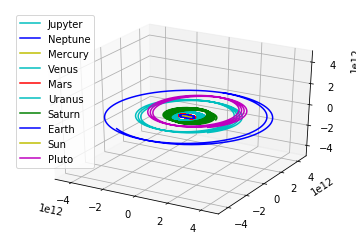

In [208]:
plot_output(motions)

In [180]:
[motions[i]["name"] for i in range(len(motions))] 

['Jupyter',
 'Neptune',
 'Mercury',
 'Venus',
 'Mars',
 'Uranus',
 'Saturn',
 'Earth',
 'Sun',
 'Pluto']

In [155]:
#motions[0]

No handles with labels found to put in legend.


7999


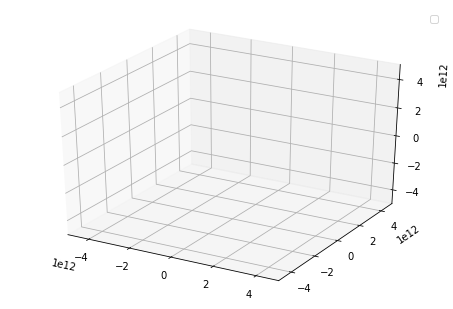

In [209]:
fig = plt.figure()
ax = p3.Axes3D(fig)

def update(num, data, lines):
    for i in range(len(lines)):
        lines[i].set_data(data[i][:2, :num])
        lines[i].set_3d_properties(data[i][2, :num])
        
max_range = 0
for current_body in motions: 
    max_dim = max(
        max(current_body["x"]),
        max(current_body["y"]),
        max(current_body["z"]))
    
    if max_dim > max_range:
        max_range = max_dim
        
ax.set_xlim([-max_range,max_range])    
ax.set_ylim([-max_range,max_range])
ax.set_zlim([-max_range,max_range])
ax.legend()        

lines = []
data = []

for motion in motions:
    line, = ax.plot(
        sun[0, 0:1], 
        sun[1, 0:1], 
        sun[2, 0:1],
        c = color_dict[motion["name"]],
        label = motion["name"])
    lines.append(line)
    data.append(np.array([motion["x"], motion["y"], motion["z"]]))
    
N = len(data[0][0])

print(N)
ani = animation.FuncAnimation(
    fig, 
    update, 
    N, 
    fargs=(data, lines), 
    interval=10000/N, 
    blit=False)

#ani.save('matplot003.gif', writer='imagemagick')
ani

In [215]:
ani.save("file.mp4")